In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import signalgenerator as sg

In [2]:
f1 = 5.25
f2 = 5.25
a1 = 128
a2 = 153
dT = 0.01
data_points = 300
timesteps = [i*dT for i in range(data_points)]
real_freq = [f1]*data_points

simulated_signal, frequencies = sg.complexSignal(f1, f2, a1, a2, data_points = data_points)

In [3]:
from flcfilters import FLC, WFLC, BMFLC, EBMFLC, BMWFLC

# WFLC

In [4]:
wflc = WFLC(n=1,mu=0.4,mu0=0.000000001 ,f0=4.5)
estimated_signal = []
estimated_freq = []
time = 0.00
time_step = 0.01

for i in range(len(simulated_signal)):
    SIG = simulated_signal[i]
    est = wflc.WFLC(time, SIG)
    estimated_signal.append(est)
    estimated_freq.append(wflc.estimatedFrequency)
    time += time_step

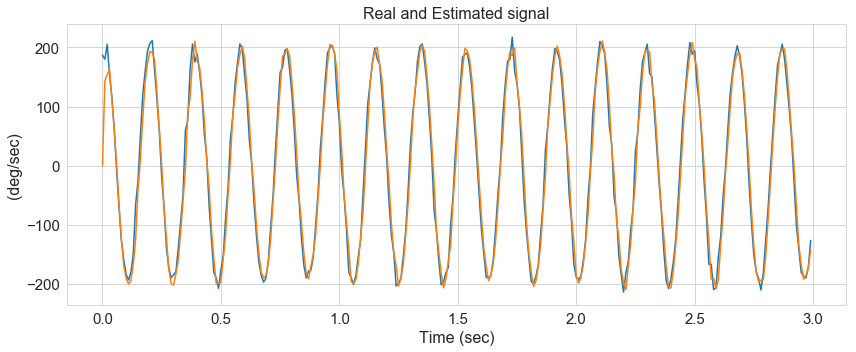

In [5]:
timesteps = [i*0.01 for i in range(len(estimated_signal))]
# plot signal
plt.figure(figsize=(12, 5))
plt.title("Real and Estimated signal", size = 16)
plt.ylabel("(deg/sec)", size = 16)
plt.xlabel("Time (sec)", size = 16)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps, simulated_signal)
plt.plot(timesteps, estimated_signal)
plt.tight_layout()
plt.show()